# **NLP(Natural Language Processing, 자연어 처리)**

# **Settings**

In [1]:
! pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.7 MB/s eta 0:00:00


In [15]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.6 MB/s eta 0:00:00


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/메타버스 아카데미/Data/')
import warnings
warnings.filterwarnings('ignore')                       # warning 출력 false

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# **1.데이터 불러오기**
* 배달의 민족 리뷰 웹크롤링 데이터

In [12]:
data = pd.read_csv('appreply.csv',index_col=0)
data = data.iloc[3:,:].reset_index(drop=True)
print(data.shape)
data.head(10)

(1000, 2)


,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
5,찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...,2
6,"앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...",5
7,음식배달 후 시간이 지나면 리뷰를 요청하는 알림이 상단에 뜹니다. 리뷰를 적기위해 ...,3
8,"식사 한번에 최소 15000원 이상 주문, 거기에 배달료 3000기본이면 누가 시킵...",1
9,안 먹고 싶은 곳이나 먹고 난 후 만족하지 못한 곳을 차단할 수 있는 옵션이 생기면...,3


# **2. 데이터 전처리**

## **1) 중복된 문장 제거**

In [13]:
data = data.drop_duplicates(subset=['text'])
print(data.shape)

(1000, 2)


## **2) 결측치 확인**

In [14]:
def check_NA(data):
    na_count = data.isnull().sum()

    if na_count.sum() == 0:
        return '결측치가 없습니다.'
    else:
        return na_count

check_NA(data)

'결측치가 없습니다.'

## **3) 말뭉치 만들기**

In [16]:
from konlpy.tag import Okt
from collections import Counter

# 말뭉치 생성
documents = ' '.join(data['text'].tolist())
print(documents)

배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다. 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다. 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다. 긍정적으로 검토해주심 좋을 것 같습니다. 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요.. 먹던 메뉴도 검색가능했으면 좋겠어요! 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 :) 검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스크롤하는데 자꾸만 왼쪽 오른쪽으로 넘어가서 전체 탭이나 포장 탭을 보게 되는데 정말 불편합니다. 검색 후 배달 탭, 포장 탭, B마트 탭 뭐든 하나를 선택했으면 좌우로 넘기는 건 안 되게 하시면 안되나요? 가끔 그러는 것도 아니고 스크롤 한 번 내릴 때마다 왼쪽으로 넘어가서 전체 탭에 가게 되니까 너무 불편하고 답답해서 씁니다 배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니다. 그리고 지역에 따라 추가 배달료가 있다고 별도로 체크하게 되어있어서 결국 배달팁은 5000원이 넘습니다. 10만원 이상 시키면 배달팁 0원이라는데 장난하는 것도 아니고.... 결국 하나하나 눌러가면서 가격대별 금액을 체크하고 배달팁 별도로 받는지도 확인해야합니다. 최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 업데이트 하라고 나오고 업데이트 누르면 업데이트 진행은 안되고 열기 나오고 열기 누르면 업데이트 나오고 무한반복.. 수없이 삭제와 재설치 환경설정등을 해보아도 같은 증상이네요.. 다른분들도 다 같은 증상으로 보이는 글들을

In [17]:
# 형태소 분석
okt = Okt()
nouns = okt.nouns(documents)
print(nouns)

['배달', '민족', '주문', '시', '리뷰', '자주', '참고', '편입', '니', '한가지', '건의', '사항', '최신', '순', '점순', '뿐', '제', '주문', '자하', '메뉴', '그', '메뉴', '리뷰', '확인', '수', '기능', '것', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '드', '래그', '시간', '소요', '비', '효율', '발생', '긍정', '검토', '주심', '것', '내', '주문', '과거', '목록', '검색', '기능', '분명', '이', '가게', '기억', '뭘', '찾기', '메뉴', '검색', '예', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '창', '리뷰', '보기', '검색', '화면', '전체', '배달', '포장', '탭', '중', '배달', '탭', '스', '크롤', '볼', '때', '아래', '스', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '탭', '포장', '탭', '정말', '검색', '후', '배달', '탭', '포장', '탭', '마트', '탭', '뭐', '하나', '선택', '좌우', '건', '안', '가끔', '것', '스', '크롤', '번', '때', '왼쪽', '전체', '탭', '가게', '배달', '팁', '순', '정렬', '식', '가게', '가장', '위로', '지역', '추가', '배달', '료', '별도', '체크', '배달', '팁', '이상', '배달', '팁', '장난', '것', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '팁', '별도', '확인', '최근', '업데이트', '안드로이드', '사양', '정도', '배민', '어플', '실행', '시', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기',

In [18]:
# 빈도 수 체크
counter = Counter(nouns)
print(counter)

Counter({'배달': 938, '주문': 544, '가게': 373, '리뷰': 352, '앱': 351, '메뉴': 341, '배민': 302, '수': 288, '사용': 282, '것': 257, '결제': 242, '기능': 234, '때': 226, '어플': 223, '검색': 197, '음식': 193, '업데이트': 178, '쿠폰': 176, '더': 173, '다시': 168, '시간': 159, '취소': 156, '좀': 140, '점': 140, '확인': 139, '왜': 138, '비': 130, '고객': 127, '화면': 126, '전화': 125, '개선': 121, '다른': 115, '로그인': 115, '계속': 113, '안': 111, '이용': 109, '거': 109, '추가': 108, '이': 105, '문제': 103, '생각': 102, '선택': 101, '그': 96, '번': 95, '제': 94, '사람': 94, '팁': 92, '경우': 91, '곳': 91, '진짜': 90, '오류': 89, '후': 88, '정말': 85, '요': 85, '찜': 85, '그냥': 84, '설정': 83, '하나': 82, '삭제': 78, '매장': 78, '민족': 77, '사항': 76, '뭐': 76, '볼': 74, '개': 74, '순': 73, '내': 73, '요청': 73, '이벤트': 72, '시': 71, '기사': 71, '저': 70, '전': 70, '인증': 70, '별로': 69, '바로': 69, '사진': 68, '입력': 66, '시스템': 66, '포장': 64, '서비스': 64, '말': 64, '음식점': 63, '업체': 63, '목록': 62, '한번': 62, '때문': 62, '할인': 61, '카드': 61, '주소': 60, '센터': 60, '자주': 58, '집': 58, '또': 58, '연결': 58, '부분': 57, '등록': 57, '금액

In [19]:
# 빈도수 길이 1이상인 상위 10개 키워드 추출
noun_data = Counter([x for x in nouns if len(x)>1])
noun_data.most_common(10)

[('배달', 938),
 ('주문', 544),
 ('가게', 373),
 ('리뷰', 352),
 ('메뉴', 341),
 ('배민', 302),
 ('사용', 282),
 ('결제', 242),
 ('기능', 234),
 ('어플', 223)]

## **4) 토크나이즈**

### **텍스트 전처리**

In [28]:
import re
from tqdm import tqdm

# 텍스트 전처리(내 방법)
nouns_result = []
for sent in tqdm(data['text'].tolist()):
    sent = re.sub('[^ㄱ-ㅣ가-힣\s+]','',sent)
    sent_nouns = okt.nouns(sent)

    nouns_result.append([x for x in sent_nouns if len(x) > 1])

print(nouns_result)

100%|██████████| 1000/1000 [00:14<00:00, 69.04it/s]

[['배달', '민족', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심'], ['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기'], ['검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게'], ['배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인'], ['최근', '업데이트', '안드로이드', '사양', '정도', '배민', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트'], ['매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말',

In [29]:
# 텍스트 전처리(수업)
noun_result = []

for temp in tqdm(data['text']):
    han = re.compile('[^ㄱ-ㅣ가-힣]')
    temp_result = han.sub(' ',temp)
    temp_noun = okt.nouns(temp_result)
    result_noun = [x for x in temp_noun if len(x) > 1]

    noun_result.append(result_noun)

print(noun_result)

100%|██████████| 1000/1000 [00:14<00:00, 69.38it/s]

[['배달', '민족', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심'], ['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기'], ['검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게'], ['배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인'], ['최근', '업데이트', '안드로이드', '사양', '정도', '배민', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트'], ['매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말',

### **BOW**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=lambda x:x, lowercase=False)
bow_vec = count_vectorizer.fit_transform(noun_result)
word_list = count_vectorizer.get_feature_names_out()
print(len(word_list), word_list)

2795 ['가게' '가격' '가계' ... '희망' '흰색' '히어로']


In [33]:
print(bow_vec.toarray().shape)
bow_vec.toarray()

(1000, 2795)


array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
# 단어별 전체 등장 횟수
count_list = bow_vec.toarray().sum(axis=0)
print(count_list)
word_count = {w:c for w,c in zip(word_list, count_list)}
print(word_count)

[373  41   1 ...   1   1   1]
{'가게': 373, '가격': 41, '가계': 1, '가공': 2, '가관': 2, '가구': 1, '가기': 10, '가까스로': 1, '가까윤': 1, '가까이': 2, '가끔': 20, '가나': 3, '가능': 17, '가도': 2, '가독성': 1, '가뜩이나': 2, '가라': 2, '가량': 2, '가령': 1, '가로': 1, '가르침': 1, '가맹': 7, '가면': 6, '가방': 2, '가성': 2, '가안': 1, '가야': 4, '가요': 31, '가운데': 1, '가원': 3, '가이드': 2, '가입': 54, '가입자': 1, '가장': 19, '가정': 3, '가족': 8, '가족사진': 1, '가지': 36, '가짐': 1, '가짜': 1, '가치': 2, '각고': 1, '각성': 1, '각오': 1, '각종': 2, '간다': 1, '간만': 1, '간반': 1, '간좀': 1, '간지': 1, '간짜장': 1, '간편': 4, '간혹': 4, '갈리': 1, '갈수': 2, '갈수록': 15, '감고': 1, '감당': 1, '감사': 7, '감성': 1, '감소': 1, '감수': 1, '감안': 2, '감자': 2, '감정': 4, '갑니닼': 1, '갑자기': 30, '강국': 1, '강요': 4, '강원도': 1, '강의': 1, '강점': 1, '강제': 11, '강조': 3, '강탈': 2, '개념': 2, '개도': 5, '개돼지': 1, '개발': 16, '개발자': 19, '개별': 5, '개보': 1, '개불': 1, '개뿔': 2, '개선': 121, '개속': 1, '개수': 5, '개승': 1, '개악': 1, '개열': 1, '개월': 4, '개인': 18, '개인정보': 3, '개인정보보호법': 1, '개판': 2, '개편': 10, '개후': 1, '객관': 1, '갤러리': 5, '갤럭시': 9, '갤탭': 1, '갯수': 2, '갱신

### **TF-IDF**

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_vectorizer = TfidfTransformer()
tf_idf = tf_vectorizer.fit_transform(bow_vec)
print(tf_idf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.19910076 0.         0.         ... 0.         0.         0.        ]
 [0.07763765 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.06731077 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## **5) 라벨 변경**

In [40]:
data['score_real'] = np.where(data['score'] >= 4, 1, 0)
data.head(10)

,text,score,score_real
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0
5,찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...,2,0
6,"앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...",5,1
7,음식배달 후 시간이 지나면 리뷰를 요청하는 알림이 상단에 뜹니다. 리뷰를 적기위해 ...,3,0
8,"식사 한번에 최소 15000원 이상 주문, 거기에 배달료 3000기본이면 누가 시킵...",1,0
9,안 먹고 싶은 곳이나 먹고 난 후 만족하지 못한 곳을 차단할 수 있는 옵션이 생기면...,3,0


# **3. 데이터 탐색**

## **1) 긍/부정 분포 확인**

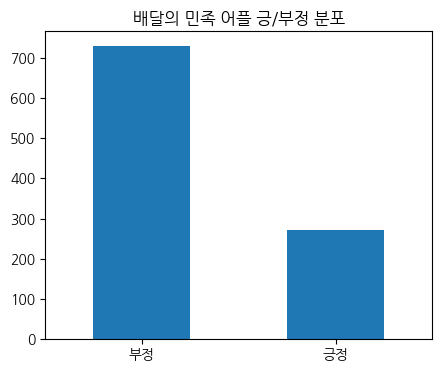

In [45]:
fig, ax = plt.subplots(figsize=(5,4))

data['score_real'].value_counts().plot.bar(rot=0,ax=ax)
ax.set(xticklabels=['부정','긍정'],title='배달의 민족 어플 긍/부정 분포')

plt.show()

# **4. 모델 설정 및 학습**

In [52]:
from sklearn.model_selection import train_test_split

X = tf_idf.toarray()
y = data['score_real'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(f'X_train {X_train.shape} X_test {X_test.shape} y_train {y_train.shape} y_test {y_test.shape}')

X_train (700, 2795) X_test (300, 2795) y_train (700,) y_test (300,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [57]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.87       219
           1       0.88      0.27      0.42        81

    accuracy                           0.79       300
   macro avg       0.83      0.63      0.64       300
weighted avg       0.81      0.79      0.75       300



# **5. 긍/부정의 키워드 추출**

In [58]:
invert_index_vectorizer = {v:k for k,v in count_vectorizer.vocabulary_.items()}
print(invert_index_vectorizer)

{969: '배달', 907: '민족', 2181: '주문', 718: '리뷰', 1974: '자주', 2311: '참고', 2551: '편입', 2643: '한가지', 130: '건의', 1194: '사항', 2375: '최신', 2079: '점순', 1978: '자하', 807: '메뉴', 2747: '확인', 321: '기능', 131: '검색', 2517: '특정', 1318: '수가', 1030: '보기', 1794: '위해', 680: '래그', 1386: '시간', 1302: '소요', 2776: '효율', 945: '발생', 316: '긍정', 137: '검토', 2191: '주심', 218: '과거', 845: '목록', 1088: '분명', 0: '가게', 341: '기억', 2319: '찾기', 203: '곱창', 2409: '치면', 2740: '화면', 2060: '전체', 2569: '포장', 2459: '크롤', 1472: '아래', 1958: '자꾸만', 1720: '왼쪽', 1681: '오른쪽', 2099: '정말', 749: '마트', 2621: '하나', 1259: '선택', 2169: '좌우', 10: '가끔', 2096: '정렬', 33: '가장', 1788: '위로', 2246: '지역', 2382: '추가', 1022: '별도', 2349: '체크', 763: '만원', 1862: '이상', 1994: '장난', 1: '가격', 542: '대별', 312: '금액', 2368: '최근', 1601: '업데이트', 1502: '안드로이드', 1176: '사양', 2094: '정도', 972: '배민', 1583: '어플', 1446: '실행', 2629: '하라', 2279: '진행', 1656: '열기', 865: '무한', 938: '반복', 1196: '삭제', 1267: '설치', 2753: '환경설정', 2228: '증상', 468: '다른', 1858: '이번', 230: '관련', 2524: '파일', 269

In [60]:
coef_pos_index = sorted([(val, ind) for ind, val in enumerate(lr_model.coef_[0])], reverse=True)
print(coef_pos_index)

[(2.1016043607710033, 807), (1.9760471135119748, 321), (1.9297588938631083, 1179), (1.8211507068115087, 718), (1.2889263573014216, 1194), (1.2689054870539946, 471), (1.2220243846209684, 2425), (1.2066579760427083, 1532), (1.1296264693275113, 1259), (1.0290021412807717, 1168), (1.0093277234919016, 2382), (0.9991892384536988, 2643), (0.9721510182420728, 1818), (0.9478125222000975, 130), (0.8122602839302548, 922), (0.8058719301879141, 812), (0.76284385755824, 0), (0.7548557469700455, 1702), (0.738982354153455, 1646), (0.6661481136420179, 2583), (0.6651119587722136, 749), (0.6620889242340152, 2729), (0.6509412255474868, 1998), (0.6412612850975726, 1707), (0.6390953853622061, 2099), (0.6343879154189602, 1017), (0.627782241354881, 131), (0.6267524280050226, 2161), (0.6198537471124463, 1974), (0.614843516902537, 1211), (0.6127187300262953, 84), (0.6121900120438738, 2599), (0.6115557430925698, 1087), (0.6013966344578836, 2447), (0.5885186621227853, 1237), (0.5872132118353387, 907), (0.58122605

In [64]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

메뉴 2.1016043607710033
기능 1.9760471135119748
사용 1.9297588938631083
리뷰 1.8211507068115087
사항 1.2889263573014216
다만 1.2689054870539946
카테고리 1.2220243846209684
애용 1.2066579760427083
선택 1.1296264693275113
사람 1.0290021412807717
추가 1.0093277234919016
한가지 0.9991892384536988
음식 0.9721510182420728
건의 0.9478125222000975
바로 0.8122602839302548
메모 0.8058719301879141
가게 0.76284385755824
옵션 0.7548557469700455
역시 0.738982354153455
표시 0.6661481136420179


In [65]:
coef_neg_index = sorted([(val, ind) for ind, val in enumerate(lr_model.coef_[0])], reverse=False)
print(coef_neg_index)

[(-1.2244436165899735, 1601), (-1.1383364020941502, 2454), (-0.9783327322099543, 703), (-0.9428225423083192, 238), (-0.9096398640013895, 1386), (-0.8216536379438449, 514), (-0.7983350191615193, 2277), (-0.750903689319812, 1266), (-0.7293908928235137, 1880), (-0.7260600708983116, 2740), (-0.7176651337540981, 336), (-0.6610128322271539, 2402), (-0.6534488724553965, 1283), (-0.6381082887135636, 66), (-0.6139671941015349, 2241), (-0.5933615564466588, 862), (-0.5870341102493167, 55), (-0.5815604199605027, 1207), (-0.5727675083949342, 2125), (-0.5702119567518448, 173), (-0.5674187494407578, 2368), (-0.5624378424375465, 2063), (-0.5450910694392824, 856), (-0.5445962473269671, 476), (-0.5440625102532248, 1590), (-0.5439053942447832, 1006), (-0.5406099622625937, 2323), (-0.5403196529214822, 1677), (-0.5334919524328029, 601), (-0.53089810768835, 294), (-0.5162970742031205, 627), (-0.5124579541092352, 2377), (-0.5026693107400575, 2249), (-0.5012709360553662, 673), (-0.48308743933438925, 436), (-0

In [66]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

업데이트 -1.2244436165899735
쿠폰 -1.1383364020941502
로그인 -0.9783327322099543
광고 -0.9428225423083192
시간 -0.9096398640013895
답변 -0.8216536379438449
진짜 -0.7983350191615193
설정 -0.750903689319812
이제 -0.7293908928235137
화면 -0.7260600708983116
기사 -0.7176651337540981
취소 -0.6610128322271539
센터 -0.6534488724553965
갑자기 -0.6381082887135636
지도 -0.6139671941015349
무조건 -0.5933615564466588
갈수록 -0.5870341102493167
상담 -0.5815604199605027
제대로 -0.5727675083949342
고객 -0.5702119567518448


# **6. 긍/부정 검증**

In [70]:
def comment_predict(text):
    sentence_text = re.sub('[^ㄱ-ㅣ가-힣\s+]','',text)
    temp = okt.nouns(sentence_text)
    result_noun = [x for x in temp if len(x) > 1]

    bow_vec = count_vectorizer.transform([result_noun])
    tfidf = tf_vectorizer.transform(bow_vec)

    result = ''
    if lr_model.predict(tfidf)[0] == 1:
        result = '긍정'
    else:
        result = '부정'

    return result

In [74]:
text = '메뉴가 다양해서 너무 좋았어요'
print(text, '>>>', comment_predict(text))

text = '서비스가 엉망이에요 싫어요'
print(text, '>>>', comment_predict(text))

메뉴가 다양해서 너무 좋았어요 >>> 긍정
서비스가 엉망이에요 싫어요 >>> 부정
